In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Load the dataset
df = pd.read_csv("cardio11.csv")
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [53]:
# Check for missing values
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [54]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                3999 non-null   object 
 1   Checkup                       3999 non-null   object 
 2   Exercise                      3999 non-null   object 
 3   Heart_Disease                 3999 non-null   object 
 4   Skin_Cancer                   3999 non-null   object 
 5   Other_Cancer                  3999 non-null   object 
 6   Depression                    3999 non-null   object 
 7   Diabetes                      3999 non-null   object 
 8   Arthritis                     3999 non-null   object 
 9   Sex                           3999 non-null   object 
 10  Age_Category                  3999 non-null   object 
 11  Height_(cm)                   3999 non-null   int64  
 12  Weight_(kg)                   3999 non-null   float64
 13  BMI

In [55]:
# Statistical summary of the dataset
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,170.224056,84.683803,29.153473,3.719180,25.750188,13.097024,6.654914
std,10.626066,21.586439,6.738667,7.280756,22.698094,14.223721,9.278469
min,122.000000,32.660000,14.060000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.410000,0.000000,8.000000,4.000000,2.000000
50%,170.000000,81.650000,28.130000,0.000000,20.000000,8.000000,4.000000
75%,178.000000,97.520000,32.550000,4.000000,30.000000,16.000000,8.000000
max,218.000000,208.650000,68.020000,30.000000,120.000000,120.000000,120.000000


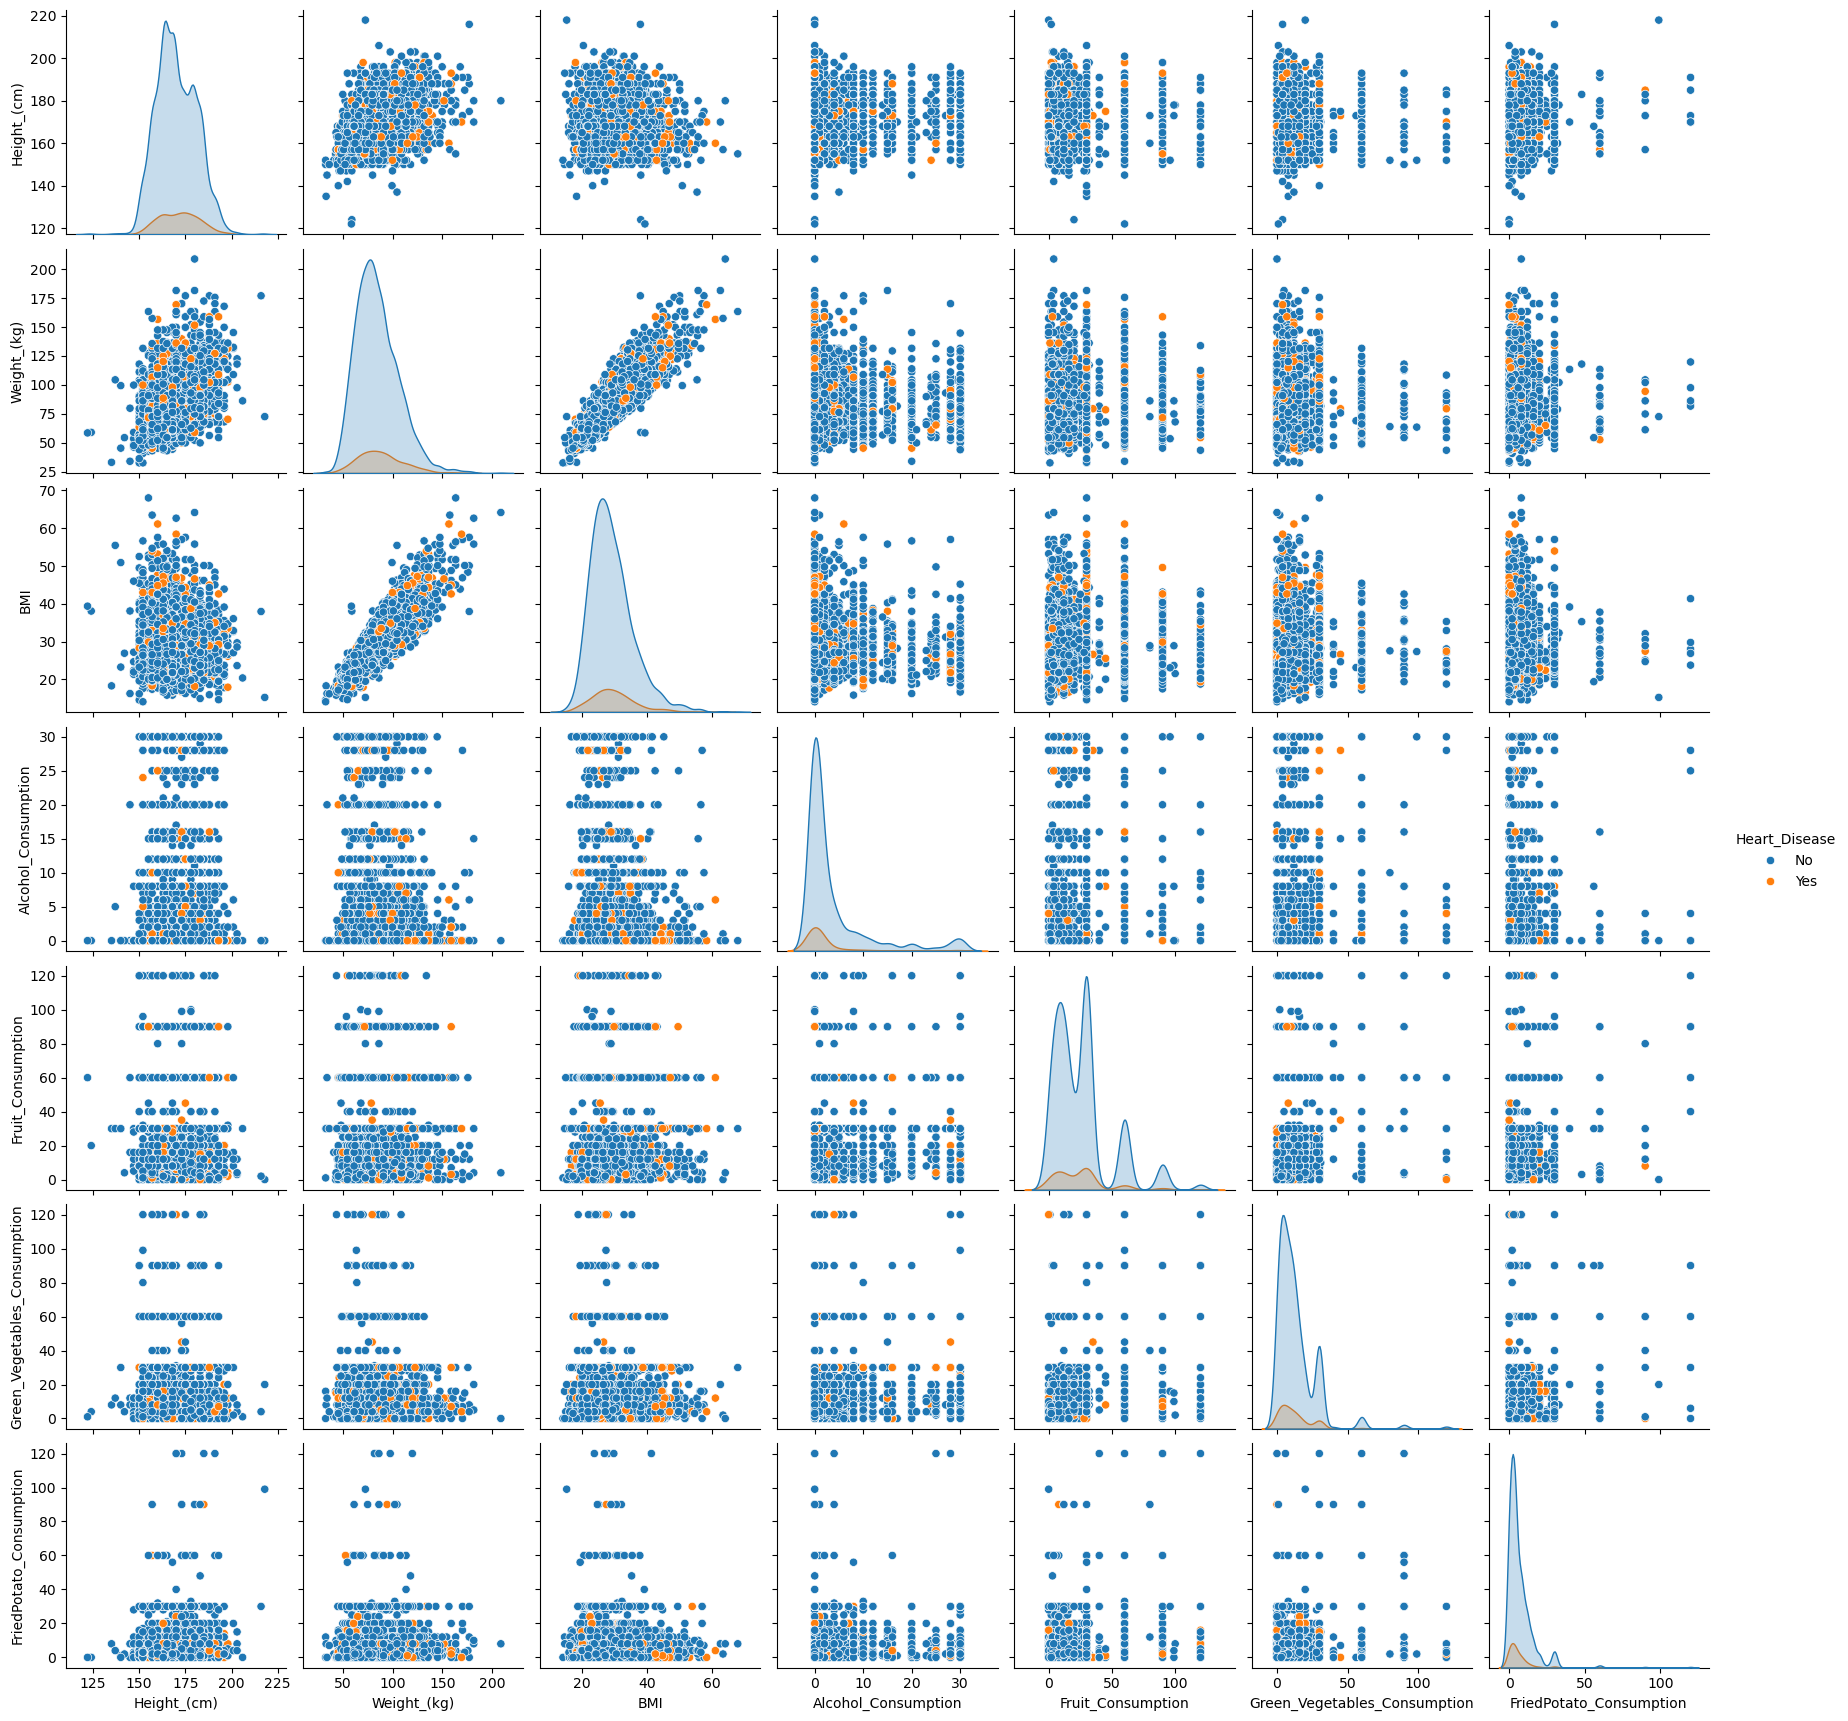

In [56]:
# Visualization
sns.pairplot(df, hue='Heart_Disease')

Heart_Disease
No     3582
Yes     417
Name: count, dtype: int64

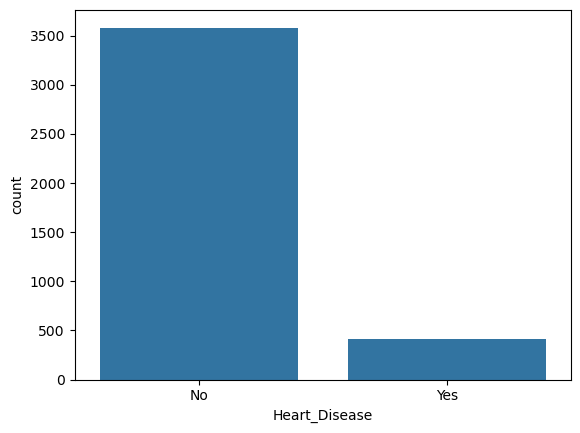

In [57]:
# Count plot of target variable
sns.countplot(x='Heart_Disease', data=df)
df['Heart_Disease'].value_counts()

In [58]:

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

categorical_columns = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 
                       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 
                       'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 
                       'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,No,0,0,0,0,1,0,10,150,32.66,14.54,1,0,20,16,11
1,4,4,0,Yes,0,0,0,2,0,0,10,165,77.11,28.29,0,0,20,0,4
2,4,4,1,No,0,0,0,2,0,0,8,163,88.45,33.47,0,4,11,3,15
3,3,4,1,Yes,0,0,0,2,0,1,11,180,93.44,28.73,0,0,20,28,8
4,2,4,0,No,0,0,0,0,0,1,12,191,88.45,24.37,1,0,8,4,0


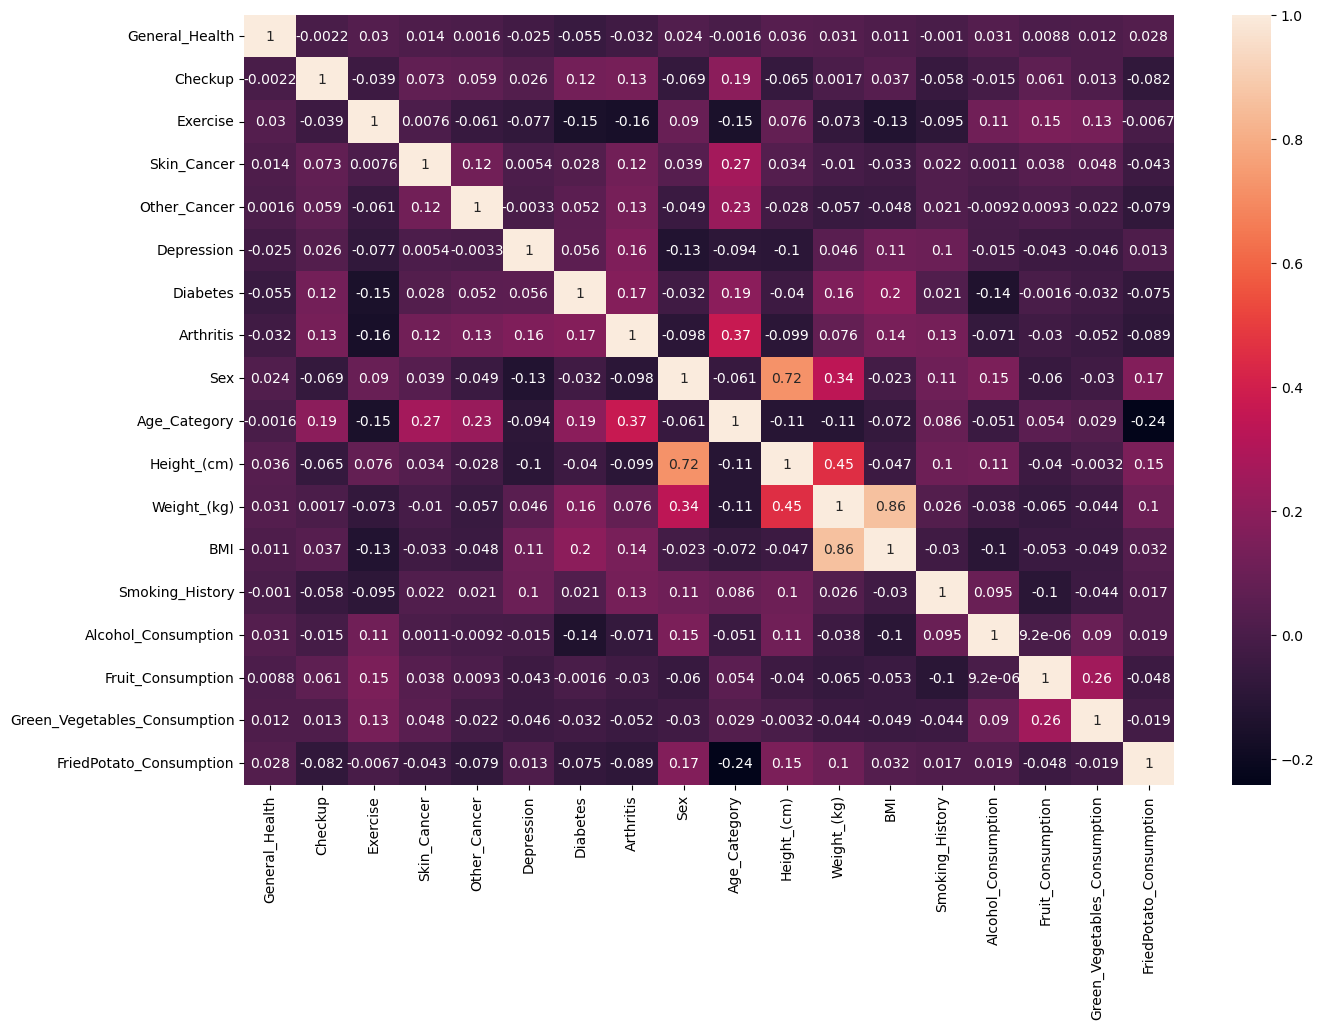

In [59]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

corr = df_numeric.corr()
plt.figure(figsize=(15, 10))

# Plot the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()

In [60]:
# Splitting the data into features and target variable
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

In [97]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=2)

In [99]:

# Importing the classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


In [101]:
# Training the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [103]:
# Predicting the test set results
y_pred = knn.predict(X_test)

In [105]:
# Evaluating the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_pred, y_test))
print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")

              precision    recall  f1-score   support

          No       0.98      0.82      0.90        79
         Yes       0.00      0.00      0.00         1

    accuracy                           0.81        80
   macro avg       0.49      0.41      0.45        80
weighted avg       0.97      0.81      0.89        80

Accuracy Score: 0.8125


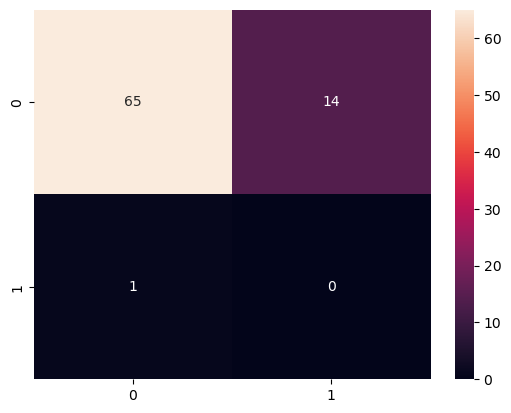

In [107]:
# Confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

plt.show()
